# Week 13: Clustering

## Brief Recap:

* Hello, how are you?
* Today: Clustering!
* Next Class (this Friday): an Introductory Guide to Neural Networks
* After Thanksgiving: Presentations!

## Mixture Densities

Before we dive into Clustering, let's discuss the concept of **Mixture Densities**  

**Mixture Densities** - complicated populations of data sampes that can be expressed as a combination of much simpler subpopulations. e.g. a mixture of gaussians

Let's visualize a mixture of gaussians...

In [7]:
# bring in some necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets import make_blobs

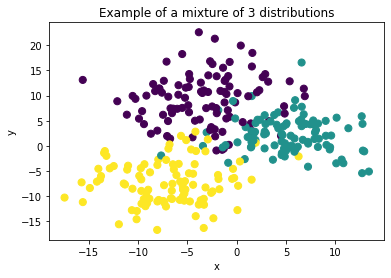

In [19]:
n_components = 3
cluster_stds = np.random.uniform(low=2, high=5, size=(n_components,))
X, blob_label = make_blobs(n_samples=300, centers=n_components, 
                      cluster_std = cluster_stds, 
                      random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50, c = blob_label)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y");

### More on Mixture Densities

A mixture density is described mathematically as: $p(\mathbf{x}) = \sum^{k}_{i=1}p(\mathbf{x}|\mathcal{G}_i)P(\mathcal{G}_i)$

$\mathcal{G}_i$ refers to each mixture component (group). We can break this mess of math down as:  

The Mixture Density ($p(\mathbf{x})$) is given by the sum from $1 \rightarrow k$ ($k =$ number of components) of the product of the density of each component ($p(\mathbf{x}|\mathcal{G}_i)$) and the mixture proportion of that component ($P(\mathcal{G}_i)$)

If we assume our system is a mixture of gaussians (as in the python example we plotted),  

* $p(\mathbf{x}|\mathcal{G}_i) \sim \mathcal{N}(\mathbf{\mu}_i, \sum _i))$
* parameters to estimate: weights, means & covariance mats for each cluster

### Classification application of Misture Densities

we can rephrase mixture densities for classification:  

* Groups $\sim$ Classes
* Component Densities $\sim$ Class Densities
* Component Priors $\sim$ Class Priors

We can rewrite: $p(\mathbf{x}) = \sum^{K}_{i=1}p(\mathbf{x}|\mathcal{C}_i)P(\mathcal{C}_i)$

### Supervised Mixture Densities

In the supervised case, we are given the labels along with the observed value. Our task is to learn the parameters that describe the distributions: priors, means & standard deviations 

For a Gaussian Mixture the parameters can be learned with [maximum likelihood](https://courses.cs.duke.edu/spring04/cps196.1/handouts/EM/tomasiEM.pdf)

### Unsupervised Mixture Densities

For the Unsupervised learning problem, we only have the observed value; the labels are unkown.  
What to do?

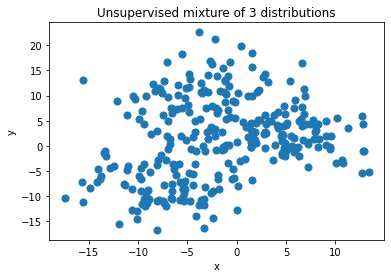

In [20]:
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title(f"Unsupervised mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y");

### Unsupervised Learning of Class Membership

To properly describe this mixture density system, we need a different approach to the problem:

1. Estimate Class Labels
2. Estimate the Parameters of the Classes

### Estimating Class Labels using k-Means Custering

k-Means is a simple algorithm for assigning class labels to data points.  
k-Means pseudocoded:  

    Initialize means as 'k' random values
    
    For a maximum number of iterations:  
        For each data point: 
            find the distance between the data point and the k means
            find the closest mean
            assign the datapoint to the closest mean
        Update the k mean values as the mean of all assigned datapoints

#### Naive k-Means

We initialize 'k' means randomly from within a given range.

but there are other options that can behave more optimally  

* **domain knowledge** - can specify wiht domain knowledge if available
* **Random Partition** - randomly assign each observation to one of the 'k', determine the k-means, and iterate from there
* **k-means++** - chose the 1st k randomly from the data points. chose the next ks with a probability proportional to the distance of the neared k that has already been assigned

`sklearn` will use k-means++ by default

#### Determining distance for the k-Means algorithm

* **Euclidean** currently, `sklearn` only support euclidean distance k-means
* **Cosine** cosine of the vector angle
* **Manhattan** sum of distance in all dimensions

#### k-Means Clustering decision

* **hard clustering** - the k-means algorithm assigns class membership for each observation to one and only one class  
    - estimated label = $\left\{ \begin{array}{rcl}
1 & \mbox{if} & \Vert x^t-m_i\Vert = \mbox{min}_j \Vert x^t-m_j \Vert \\ 
0 & \mbox{otherwise}
\end{array}\right.$
    - This can be problematic for observations near class borders.  
* **soft clustering**  algorithms that instead return class membership probability or weights

### Use `sklearn` to perform k-Means

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans( n_clusters = n_components, random_state=0 ).fit( X )
print( kmeans.cluster_centers_ )
kmeans.labels_[0:10]

[[ 4.85080024  1.99062991]
 [-7.25258595 -7.79362301]
 [-3.78851311  9.81274355]]


array([1, 1, 0, 0, 1, 0, 2, 0, 2, 2], dtype=int32)

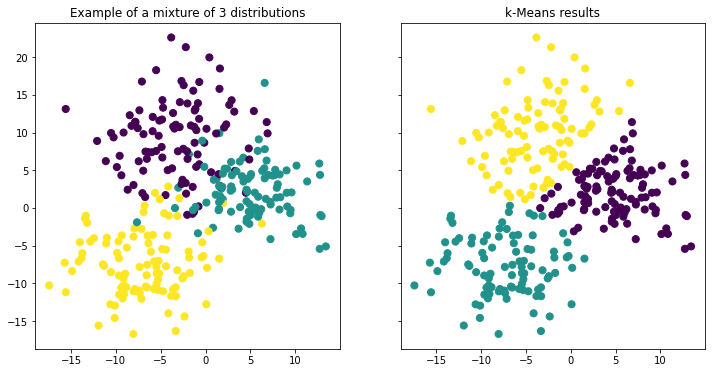

In [38]:
# visualize the results of the kMeans fit
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax2.scatter(X[:, 0], X[:, 1], s=50, c = kmeans.labels_)
ax2.set_title("k-Means results")
ax1.scatter(X[:, 0], X[:, 1], s=50, c = blob_label)
ax1.set_title(f"Example of a mixture of {n_components} distributions")
plt.show()

## What is the best 'k'?

## 🥺 This Friday will be our last lecture class 😢
<img src="https://content.techgig.com/photo/80071467/pros-and-cons-of-python-programming-language-that-every-learner-must-know.jpg?132269" width="100%" style="margin-left:auto; margin-right:auto">